In [437]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [438]:

df = pd.read_csv('https://raw.githubusercontent.com/mn42899/schulich_data_science/main/Dataset.csv')
df

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,26,Female,Sales,Sales,6079,19,0,16.867011,34.311711,7,1,Yes
9996,9997,41,Female,Sales,HR,12946,11,2,19.361893,9.009338,2,1,No
9997,9998,35,Female,Technician,Engineering,12700,1,0,0.029159,12.949511,1,1,No
9998,9999,53,Male,Engineer,Support,12013,21,3,2.106378,50.000000,4,4,No


In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Job Role               10000 non-null  object 
 4   Department             10000 non-null  object 
 5   Monthly Income         10000 non-null  int64  
 6   Years at Company       10000 non-null  int64  
 7   Number of Promotions   10000 non-null  int64  
 8   Last Raise Percentage  10000 non-null  float64
 9   Distance from Office   10000 non-null  float64
 10  Job Satisfaction       10000 non-null  int64  
 11  Performance Rating     10000 non-null  int64  
 12  Attrition              10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


In [440]:
df.isnull().sum()

Employee ID              0
Age                      0
Gender                   0
Job Role                 0
Department               0
Monthly Income           0
Years at Company         0
Number of Promotions     0
Last Raise Percentage    0
Distance from Office     0
Job Satisfaction         0
Performance Rating       0
Attrition                0
dtype: int64

In [441]:
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


In [442]:
df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})

att_df = df[df['Attrition'] == 1]

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_24170/926704965.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Job Role               10000 non-null  object 
 4   Department             10000 non-null  object 
 5   Monthly Income         10000 non-null  int64  
 6   Years at Company       10000 non-null  int64  
 7   Number of Promotions   10000 non-null  int64  
 8   Last Raise Percentage  10000 non-null  float64
 9   Distance from Office   10000 non-null  float64
 10  Job Satisfaction       10000 non-null  int64  
 11  Performance Rating     10000 non-null  int64  
 12  Attrition              10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [444]:
#14.03% of the dataset is Attritioned
att_df.value_counts().reset_index()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition,count
0,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,1,1
1,6630,29,Male,Technician,Support,5312,18,0,8.583486,17.356377,3,3,1,1
2,6683,44,Female,Manager,Sales,10920,13,0,9.329743,28.922099,3,2,1,1
3,6676,57,Female,HR,Sales,3456,16,3,17.879216,35.859275,5,2,1,1
4,6673,50,Male,Manager,HR,3020,6,4,2.872676,50.000000,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,3329,59,Female,HR,Engineering,14699,0,0,6.567386,43.484003,2,2,1,1
1399,3320,56,Male,Manager,Sales,14602,13,4,13.283897,25.255019,5,1,1,1
1400,3314,32,Female,HR,Engineering,6533,22,3,13.479548,29.696803,3,3,1,1
1401,3308,50,Female,Sales,IT,3129,12,0,18.943954,50.000000,3,1,1,1


<Axes: xlabel='Age', ylabel='Count'>

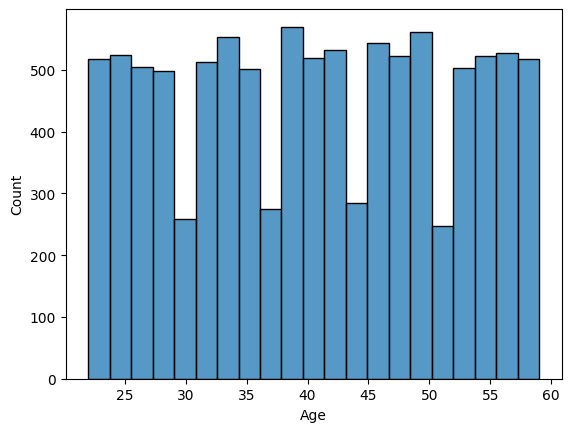

In [445]:
#Age check
sns.histplot (x=df['Age'])

<Axes: xlabel='Attrition', ylabel='Count'>

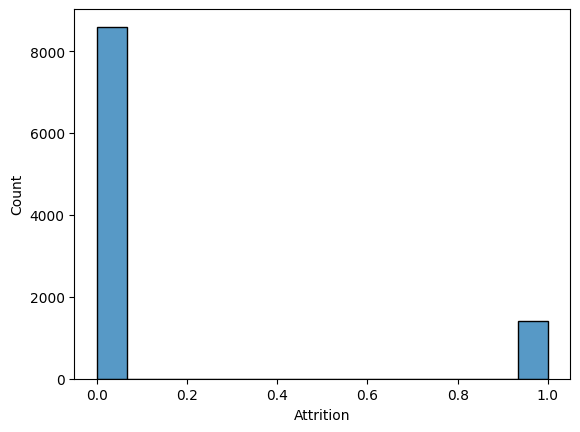

In [446]:
#Check distribution on Attrition 
sns.histplot(x=df['Attrition'])

<Axes: xlabel='Attrition', ylabel='Age'>

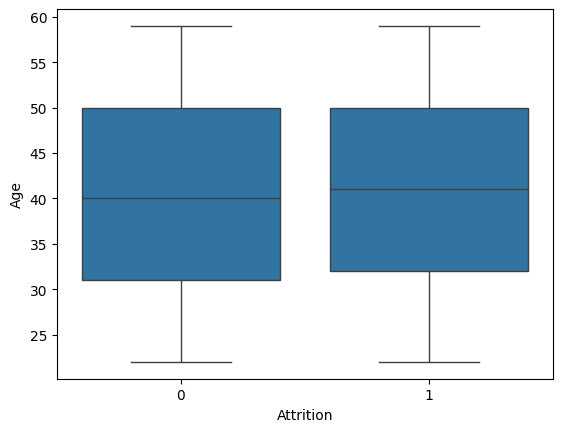

In [447]:
sns.boxplot(x='Attrition', y='Age', data=df)

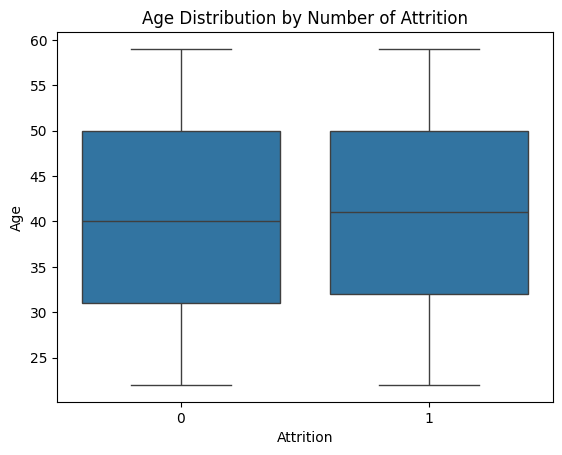

In [448]:
#No big difference in attrition based on age 

sns.boxplot(x='Attrition', y='Age', data=df)
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.title('Age Distribution by Number of Attrition')
plt.show()

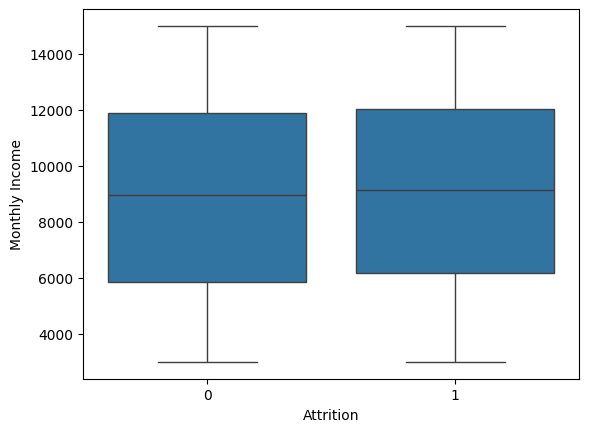

In [449]:
sns.boxplot(x= 'Attrition', y=df['Monthly Income'], data=df)
plt.show()

In [450]:
ages = df.groupby('Age')
ages.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,0
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,1
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,0
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,0
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,387,31,Male,Manager,Engineering,5525,12,2,16.969743,11.364353,7,3,0
390,391,52,Male,Engineer,IT,4609,25,3,11.033344,15.786949,7,3,0
391,392,31,Female,Engineer,Sales,8443,13,0,4.197570,2.390778,7,5,0
415,416,31,Female,Engineer,Sales,4382,12,1,14.686141,15.601300,10,1,0


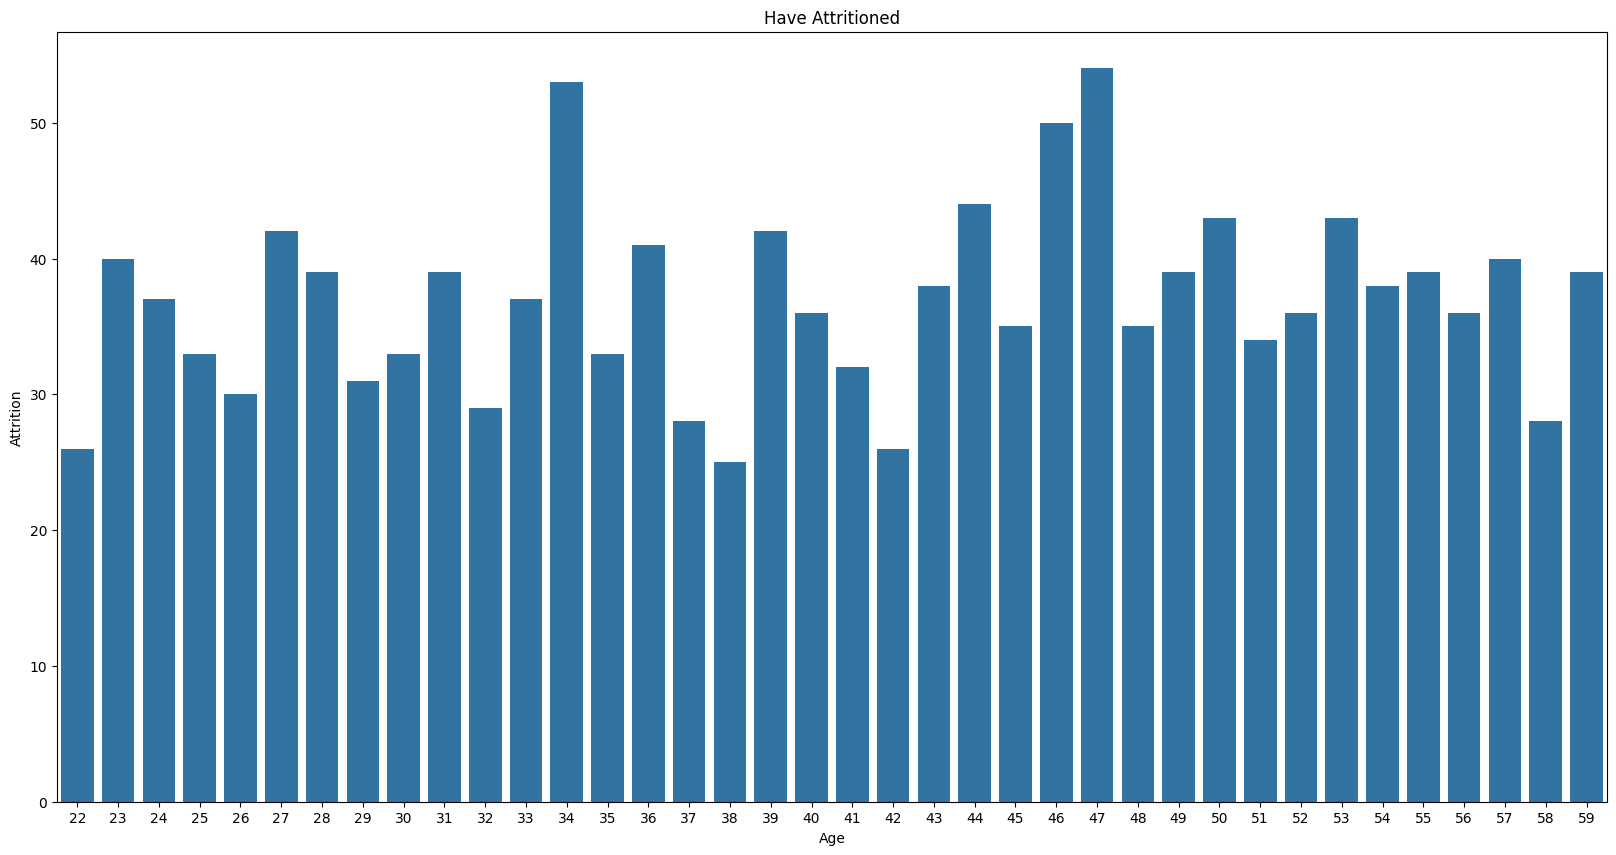

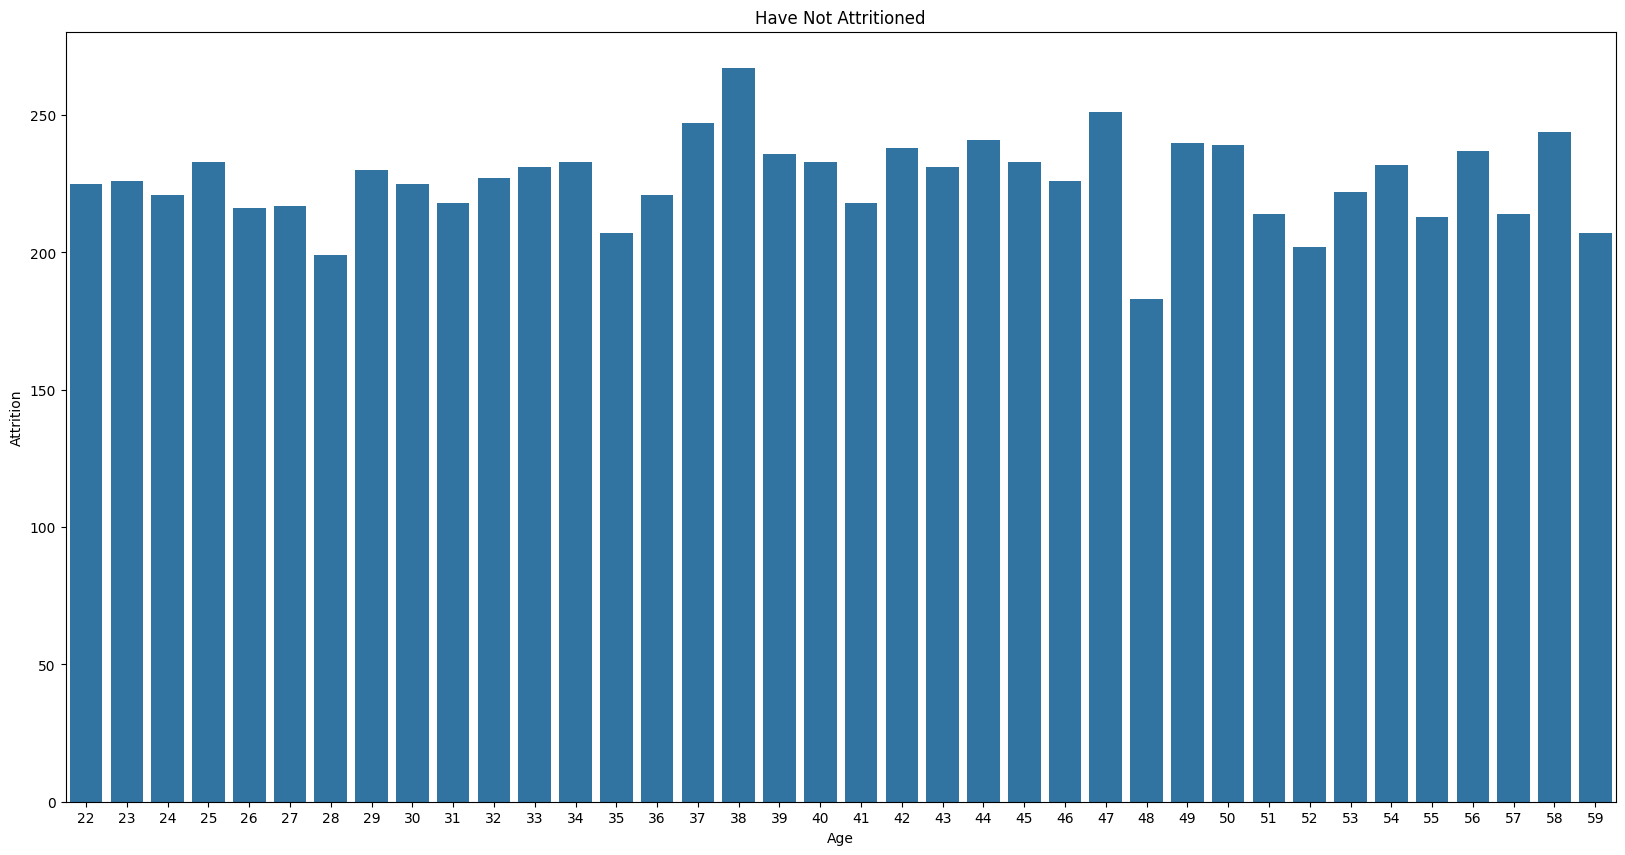

In [451]:
#No Apparent patterns in ditributions


plt.figure(figsize=(20,10))
sns.barplot(x=ages['Attrition'].sum().index, y=ages['Attrition'].sum())
plt.title("Have Attritioned")
plt.show()

noAtt = df[df['Attrition'] == 0]
noAttAge = noAtt.groupby('Age')

plt.figure(figsize=(20,10))
sns.barplot(x=noAttAge['Attrition'].count().index, y=noAttAge['Attrition'].count())
plt.title("Have Not Attritioned")
plt.show()

In [452]:
df.isnull().sum()

Employee ID              0
Age                      0
Gender                   0
Job Role                 0
Department               0
Monthly Income           0
Years at Company         0
Number of Promotions     0
Last Raise Percentage    0
Distance from Office     0
Job Satisfaction         0
Performance Rating       0
Attrition                0
dtype: int64

<Axes: xlabel='Attrition', ylabel='Performance Rating'>

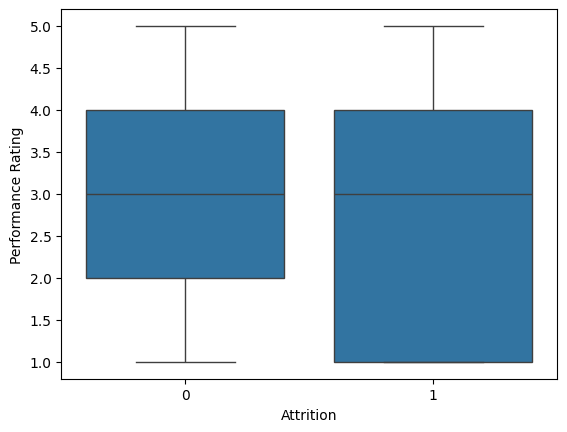

In [453]:
#Median is the same, users who have attributed have lower performance ratings
sns.boxplot(x='Attrition', y='Performance Rating', data=df)

<Axes: xlabel='Attrition', ylabel='Years at Company'>

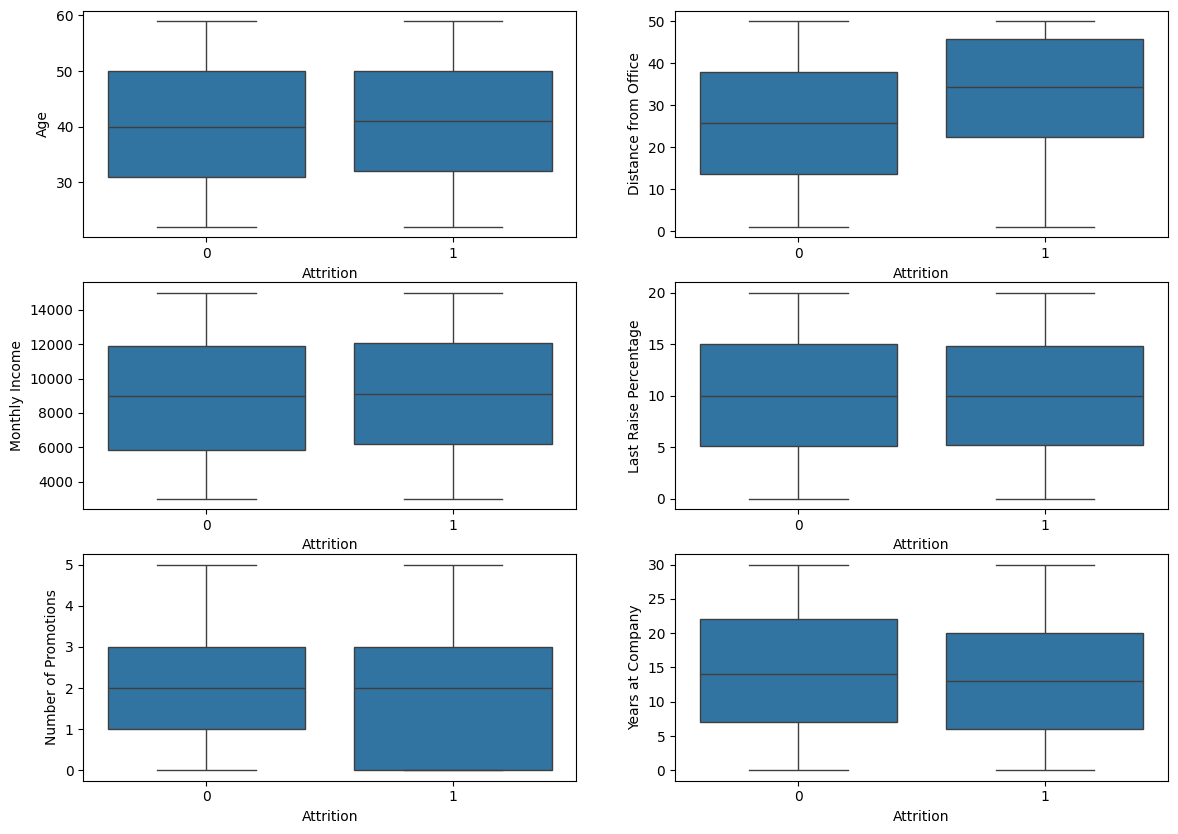

In [454]:
## data exploration
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(14,10))
sns.boxplot(x='Attrition', y='Age', data=df, ax=ax1)
sns.boxplot(x='Attrition', y='Distance from Office', data=df, ax=ax2)
sns.boxplot(x='Attrition', y='Monthly Income', data=df, ax=ax3)
sns.boxplot(x='Attrition', y='Last Raise Percentage', data=df, ax=ax4)
sns.boxplot(x='Attrition', y='Number of Promotions', data=df, ax=ax5)
sns.boxplot(x='Attrition', y='Years at Company', data=df, ax=ax6)


#Can mainly observe those who have attritioned had to commute longer distances

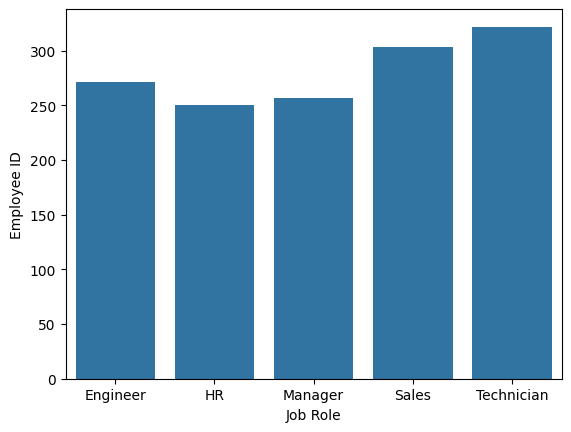

In [455]:
#Create # of Attrition count based on Job Role
loc = att_df.groupby('Job Role')
sns.barplot(x=loc['Employee ID'].count().index, y=loc['Employee ID'].count())
plt.show()

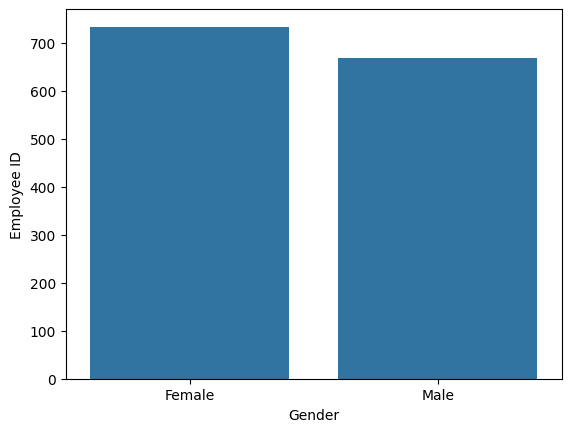

In [456]:
#Create # of Attrition count based on Gender
loc = att_df.groupby('Gender')
sns.barplot(x=loc['Employee ID'].count().index, y=loc['Employee ID'].count())
plt.show()

In [457]:
att_df.describe()

,Employee ID,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
count,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.0
mean,4971.591589,40.902352,9099.886671,13.067712,1.735567,9.997341,32.480038,4.751960,2.734854,1.0
std,2906.587663,10.845551,3452.367849,8.684540,1.363602,5.738883,14.109988,2.858988,1.382426,0.0
min,2.000000,22.000000,3002.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0
25%,2445.500000,32.000000,6176.000000,6.000000,0.000000,5.213532,22.348855,2.000000,1.000000,1.0
50%,4950.000000,41.000000,9122.000000,13.000000,2.000000,9.927292,34.346259,4.000000,3.000000,1.0
75%,7494.000000,50.000000,12045.000000,20.000000,3.000000,14.836217,45.686204,7.000000,4.000000,1.0
max,9996.000000,59.000000,14997.000000,30.000000,5.000000,20.000000,50.000000,10.000000,5.000000,1.0


In [458]:
df['Gender'].value_counts().reset_index()

,Gender,count
0,Female,5027
1,Male,4973


In [459]:
df['Number of Promotions'].value_counts().reset_index()

,Number of Promotions,count
0,0,2104
1,3,2039
2,1,2027
3,2,1993
4,4,1732
5,5,105


In [460]:
df

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,0
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,1
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,0
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,0
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,26,Female,Sales,Sales,6079,19,0,16.867011,34.311711,7,1,1
9996,9997,41,Female,Sales,HR,12946,11,2,19.361893,9.009338,2,1,0
9997,9998,35,Female,Technician,Engineering,12700,1,0,0.029159,12.949511,1,1,0
9998,9999,53,Male,Engineer,Support,12013,21,3,2.106378,50.000000,4,4,0


In [461]:
#Should I do a correlation matrix here

In [462]:
df['Job Role'].unique()

array(['HR', 'Sales', 'Technician', 'Engineer', 'Manager'], dtype=object)

In [463]:
## Feature Engineering - WHAT CAN I FEATURE HERE

df['Gender'] = df['Gender'].map({'Female': 0, 'Male' : 1})




In [464]:
df

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,1,HR,IT,11547,12,1,12.288783,41.307654,9,1,0
1,2,36,1,Sales,Support,8643,28,4,3.496371,44.733204,8,1,1
2,3,29,1,Technician,HR,12418,12,4,4.796945,18.646876,1,3,0
3,4,42,1,Technician,Support,11441,25,1,10.310471,15.790848,8,4,0
4,5,40,0,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,26,0,Sales,Sales,6079,19,0,16.867011,34.311711,7,1,1
9996,9997,41,0,Sales,HR,12946,11,2,19.361893,9.009338,2,1,0
9997,9998,35,0,Technician,Engineering,12700,1,0,0.029159,12.949511,1,1,0
9998,9999,53,1,Engineer,Support,12013,21,3,2.106378,50.000000,4,4,0


In [465]:
## Feature Selection



In [466]:
#Build the pipeline

numerical = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions', 'Last Raise Percentage', 'Distance from Office']
categorical = ['Gender', 'Job Role', 'Department']
ranking = ['Job Satisfaction', 'Performance Rating']
target = ['Attrition']

X_train, X_test, y_train, y_test = train_test_split(df[categorical + numerical + ranking] , df[target], test_size=0.3, random_state=123)

#Build the Preprocessor
catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])
rankTansformer = Pipeline(steps= [('label', OrdinalEncoder())])

preprocessor = ColumnTransformer(transformers = [('cat', catTransformer, categorical), ('num', numTransformer, numerical), ('rank', rankTansformer, ranking)])


In [467]:
#Check if theres any missing columns

missing_columns = set(numerical + categorical + ranking) - set(X_train.columns)

if missing_columns:
    print(f"Missing columns in the DataFrame: {missing_columns}")
else:
    print("All columns are present.")

 # Check data types of the columns in the DataFrame
print(X_train.dtypes)

# Check for duplicate columns
duplicate_columns = X_train.columns[X_train.columns.duplicated()]
if not duplicate_columns.empty:
    print(f"Duplicate columns found: {duplicate_columns}")
else:
    print("No duplicate columns found.")

# Check for unique values in categorical columns to ensure encoding will work correctly
for column in categorical:
    unique_values = X_train[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

All columns are present.
Gender                     int64
Job Role                  object
Department                object
Age                        int64
Monthly Income             int64
Years at Company           int64
Number of Promotions       int64
Last Raise Percentage    float64
Distance from Office     float64
Job Satisfaction           int64
Performance Rating         int64
dtype: object
No duplicate columns found.
Column: Gender, Unique Values: [1 0]
Column: Job Role, Unique Values: ['Technician' 'Manager' 'Engineer' 'Sales' 'HR']
Column: Department, Unique Values: ['IT' 'Engineering' 'Support' 'Sales' 'HR']


In [468]:
print(np.unique(pred, return_counts=True))

(array([0, 1]), array([1737, 1263]))


In [469]:
#Logistic Regression SETUP

logreg = Pipeline(steps = [('preprocessor', preprocessor), ('logistic', LogisticRegression(class_weight='balanced'))])

# fit model
logreg.fit(X_train, y_train)
# predictions
pred = logreg.predict(X_test)


# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred)
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(logreg, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

Accuracy: 0.6123333333333333
Precision: 0.20474308300395258
Recall Score: 0.6225961538461539
F1 Score: 0.30814991076740034


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Cross Validation F1 Scores: [0.34108527 0.31876607 0.2893401  0.32132964 0.32727273 0.32124352
 0.29573935 0.35380835 0.25954198 0.33924051]
Mean cross validation F1 Score: 0.31673675233979237


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [470]:
#Naive Bayes Setup

nb = Pipeline(steps = [('preprocessor', preprocessor), ('nb', GaussianNB())])
# fit
nb.fit(X_train, y_train)
# predict
pred = nb.predict(X_test)


# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)


# cross validation
crossVal = cross_val_score(nb, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Accuracy: 0.8606666666666667
Precision: 0.4166666666666667
Recall Score: 0.01201923076923077
F1 Score: 0.02336448598130841


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Cross Validation F1 Scores: [0.         0.03921569 0.01980198 0.01980198 0.         0.0776699
 0.01941748 0.01980198 0.04       0.03921569]
Mean cross validation F1 Score: 0.02749246917838557


In [471]:
#KNN Setup


knn = Pipeline(steps = [('preprocessor', preprocessor), ('knn', KNeighborsClassifier(n_neighbors=100))])

# fit model
knn.fit(X_train, y_train)
# predictions
pred = knn.predict(X_test)
# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8613333333333333
Precision: 0.0
Recall Score: 0.0
F1 Score: 0.0


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/nei

Cross Validation F1 Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean cross validation F1 Score: 0.0


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [472]:
#Random Forest

rf = Pipeline(steps= [('preprocessor', preprocessor), ('rf', RandomForestClassifier(n_estimators=100, random_state=100, class_weight='balanced'))])

rf.fit(X_train, y_train)
rf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(rf, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8613333333333333
Precision: 0.0
Recall Score: 0.0
F1 Score: 0.0


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklea

Cross Validation F1 Scores: [0.         0.03883495 0.         0.01980198 0.01980198 0.05825243
 0.03846154 0.         0.         0.03809524]
Mean cross validation F1 Score: 0.021324811559359287


In [473]:
##FIGURE OUT MY MODELS AND GRID SEARCH

#Going to try to use Logistic

# Define the hyperparameter grid
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2', 'elasticnet'],
    'logistic__solver': ['saga'],  # saga solver supports l1, l2, and elasticnet
    'logistic__class_weight': [None, 'balanced', {0: 1, 1: 10}]
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)


# Output the best hyperparameter combination
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Best hyperparameters for Logistic Regression: {'logistic__C': 0.1, 'logistic__class_weight': 'balanced', 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try 

In [474]:
#Build final pipeline with best params

logreg = Pipeline(steps= [('preprocessor', preprocessor), ('logistic', LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver='saga'))])

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred)
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

## IT DIDNT DO ANYTHING......

# cross validation
crossVal = cross_val_score(logreg, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))



Accuracy: 0.6136666666666667
Precision: 0.2058590657165479
Recall Score: 0.625
F1 Score: 0.3097081596188207


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Cross Validation F1 Scores: [0.34358974 0.31632653 0.29007634 0.31578947 0.31632653 0.31876607
 0.30693069 0.36318408 0.26329114 0.34358974]
Mean cross validation F1 Score: 0.31778703367159


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


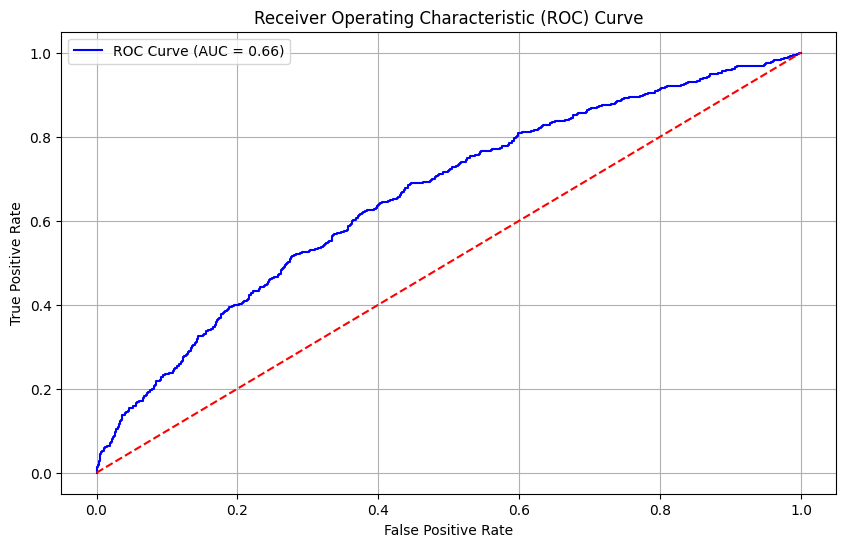

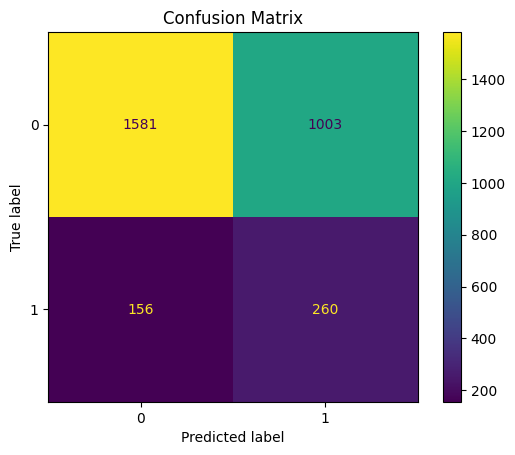

In [475]:
# Calculate ROC curve and AUC score (Example)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
## Create notes how I can interpret this for best business case + Include FEATURE ENGINEERING to infer my answer 